In [3]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/julia_codes/GaussianExpansionCavityMethod.jl/examples/BouchaudMezard`


In [61]:
using Revise 
using Random, Graphs, GaussianExpansionCavityMethod, SparseArrays, LinearAlgebra, DifferentialEquations, DifferentialEquations.EnsembleAnalysis
import PyPlot as plt

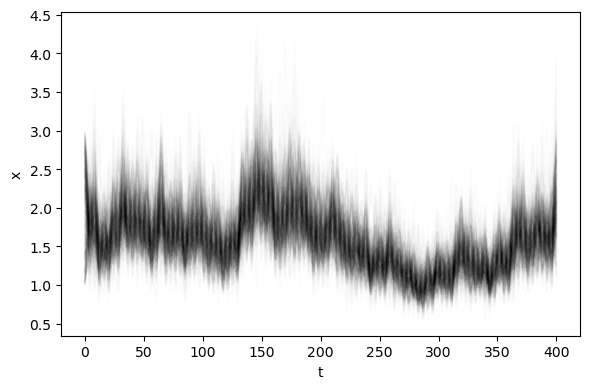

In [64]:
N, K = 400, 10

rng = Xoshiro()

J, sigma = 1.0, 1.0
Jmat = adjacency_matrix(random_regular_graph(N, K; rng=rng)) .* J
@inbounds @fastmath for i in 1:N
    Jmat[i, i] = - J * K
end

model = BMModel(K, Jmat, sigma)

x0_min, x0_max = 1.0, 3.0
x0 = rand(rng, N) .* (x0_max - x0_min) .+ x0_min
tmax = 400.0 
tsave=collect(range(0.0, tmax; length=100))

tvec, trajs = sample_BM(model, x0, tmax, tsave; rng=rng)

fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=true)
for i in 1:N
    ax.plot(tvec, view(trajs, i, :), color="k", alpha=0.01)
end
ax.set_xlabel("t")
ax.set_ylabel("x")

display(fig)

In [72]:
N, K = 400, 3

rng = Xoshiro(1234) 
J, sigma = 1.0, 2.0

x0_min, x0_max = 15.0, 28.0
tmax = 400.0
tsave = collect(range(0.0, tmax; length=100));

In [82]:
# Define ensemble model
model_ensemble = BMModelRRG(N, K, J, sigma)

# Sample ensemble
tvals_alls, traj_alls = sample_ensemble_BM(model_ensemble, x0_min, x0_max, tmax, tsave, 100; rng=Xoshiro(1234), diverging_threshold=1e15, showprogress=true);

Progress: 100%|███████████████████████████| Time: 0:02:06 ( 1.27  s/it)


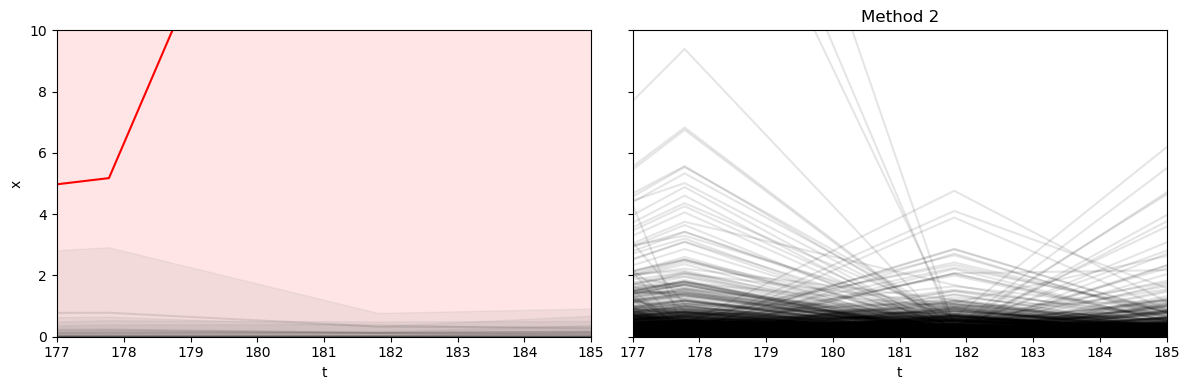

In [95]:
tmin_plot, tmax_plot = 177, 185

fig, axs = plt.subplots(1, 2, figsize=(6*2, 4), tight_layout=true, sharey=true)
# Only averages
ax = axs[1]
mean_traj, std_traj, autocorr_traj = compute_stats(traj_alls)
ax.plot(tvals_alls[1], mean_traj, color="red")
ax.fill_between(tvals_alls[1], mean_traj .- std_traj, mean_traj .+ std_traj, color="red", alpha=0.1)
for isim in 1:10
    mean, std, autocorr = compute_stats(traj_alls[isim])
    ax.plot(tvals_alls[isim], mean, color="k", alpha=0.1)
    ax.fill_between(tvals_alls[isim], mean .- std, mean .+ std, color="gray", alpha=0.1)
end
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_xlim(tmin_plot, tmax_plot)
# Method 2
ax = axs[2]
ax.set_title("Method 2")
for isim in 1:10
    for i in 1:N
        ax.plot(tvals_alls[isim], view(traj_alls[isim],i,:), color="k", alpha=0.1)
    end
end
ax.set_xlabel("t")
ax.set_ylim(0, 10)
ax.set_xlim(tmin_plot, tmax_plot)

plt.display(fig)